In [1]:
"""
This cell imports all libraries required for:
- Data handling
- Visualization
- Machine learning
- Model evaluation

This cell MUST be run first.
"""

# Numerical and data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV
)
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Set visualization style
sns.set(style="whitegrid")


In [2]:
"""
Load the dataset from the data folder.

Note:
The notebook is inside 'notebook/' and the CSV is inside 'data/',
so we move one directory up using '..'.
"""

df = pd.read_csv("../data/drug200.csv")

# Display first 5 rows to understand structure
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
"""
Initial sanity checks:
- Dataset size
- Data types
- Missing values
"""

print("Dataset Shape:", df.shape)

# Column names, types, and non-null counts
df.info()

# Check for missing values explicitly
df.isnull().sum()


Dataset Shape: (200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

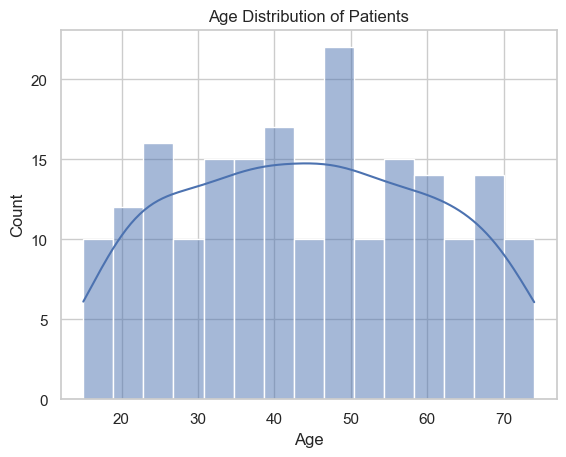

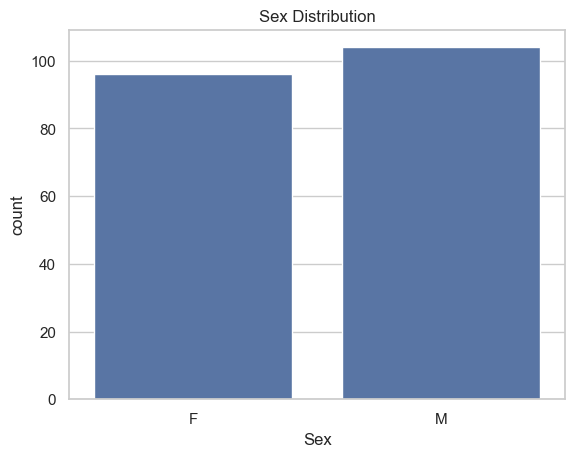

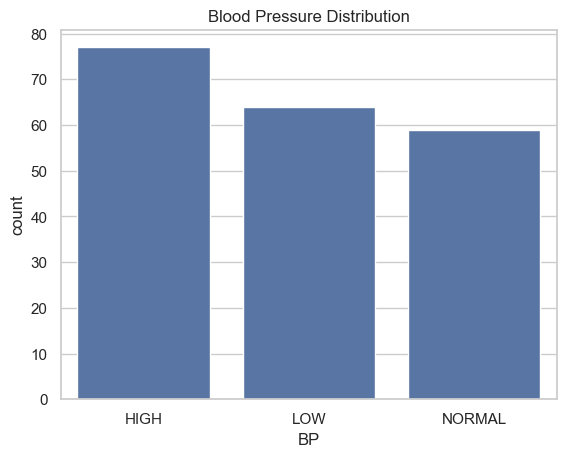

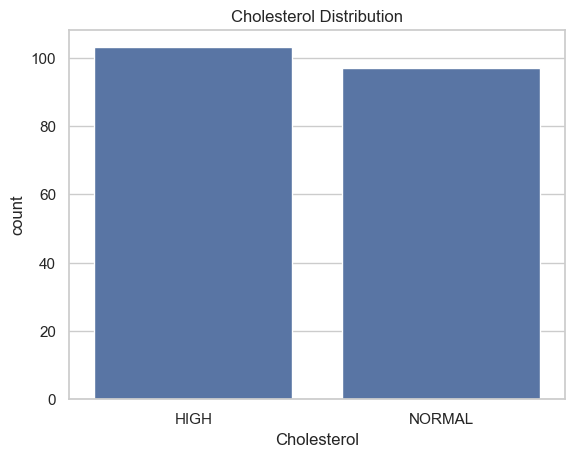

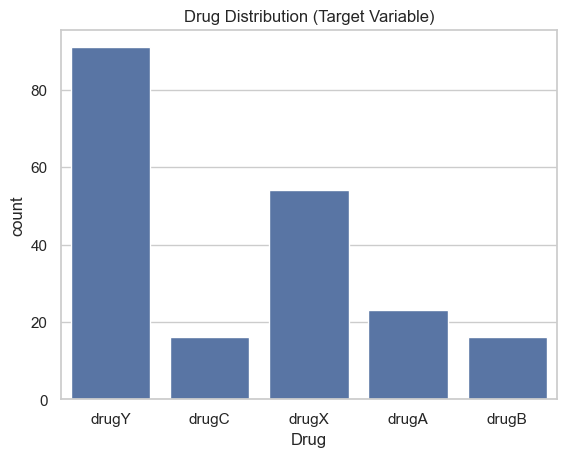

In [4]:
"""
Univariate EDA:
Understand the distribution of each feature independently.
"""

# Age distribution
plt.figure()
sns.histplot(df["Age"], bins=15, kde=True)
plt.title("Age Distribution of Patients")
plt.show()

# Sex distribution
plt.figure()
sns.countplot(x="Sex", data=df)
plt.title("Sex Distribution")
plt.show()

# Blood Pressure distribution
plt.figure()
sns.countplot(x="BP", data=df)
plt.title("Blood Pressure Distribution")
plt.show()

# Cholesterol distribution
plt.figure()
sns.countplot(x="Cholesterol", data=df)
plt.title("Cholesterol Distribution")
plt.show()

# Target variable distribution
plt.figure()
sns.countplot(x="Drug", data=df)
plt.title("Drug Distribution (Target Variable)")
plt.show()


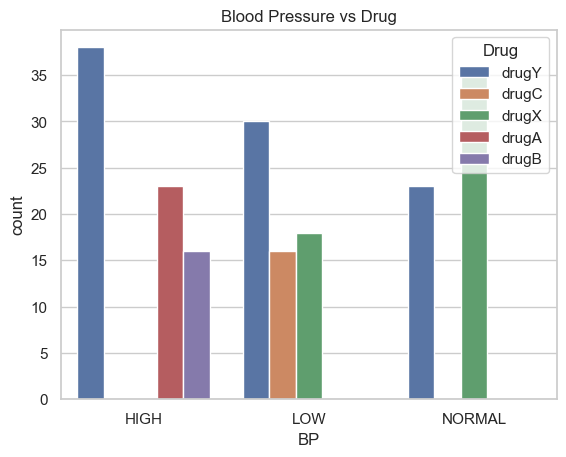

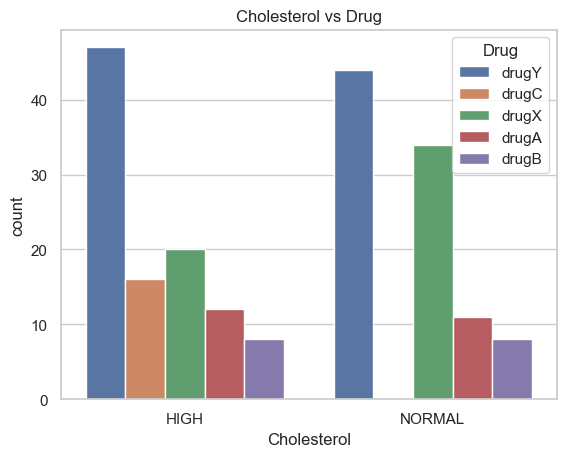

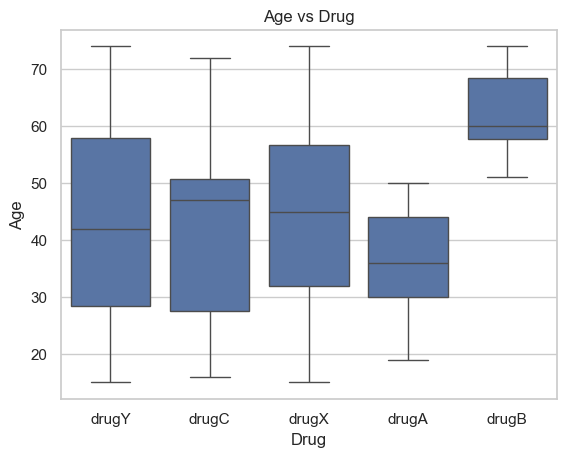

In [5]:
"""
Bivariate EDA:
Analyze relationship between features and target variable (Drug).
"""

# Blood Pressure vs Drug
plt.figure()
sns.countplot(x="BP", hue="Drug", data=df)
plt.title("Blood Pressure vs Drug")
plt.show()

# Cholesterol vs Drug
plt.figure()
sns.countplot(x="Cholesterol", hue="Drug", data=df)
plt.title("Cholesterol vs Drug")
plt.show()

# Age vs Drug
plt.figure()
sns.boxplot(x="Drug", y="Age", data=df)
plt.title("Age vs Drug")
plt.show()


In [6]:
"""
Machine learning models require numerical inputs.
Label Encoding converts categorical variables into numeric form.
"""

# Initialize encoders
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

# Encode categorical columns
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["BP"] = le_bp.fit_transform(df["BP"])
df["Cholesterol"] = le_chol.fit_transform(df["Cholesterol"])
df["Drug"] = le_drug.fit_transform(df["Drug"])

# Verify encoded data
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [7]:
"""
Split the dataset into training and testing sets.

- Stratify ensures class proportions are preserved
- 80% training, 20% testing
"""

X = df.drop("Drug", axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
"""
Logistic Regression (Baseline Model)

Note:
max_iter is increased to ensure convergence.
Even with tuning, Logistic Regression is used only
as a baseline due to linear assumptions.
"""

log_reg_model = LogisticRegression(max_iter=3000)

log_reg_model.fit(X_train, y_train)
log_reg_preds = log_reg_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))


Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00        11
           4       0.95      1.00      0.97        18

    accuracy                           0.95        40
   macro avg       0.96      0.87      0.90        40
weighted avg       0.96      0.95      0.95        40



In [9]:
"""
Decision Tree:
- Captures non-linear, rule-based relationships
- Highly interpretable (important for healthcare)
"""

dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



In [10]:
"""
Random Forest:
- Ensemble of multiple decision trees
- Reduces overfitting
- Typically offers best performance
"""

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



In [11]:
"""
Confusion matrices provide class-wise performance insights.
"""

models = {
    "Logistic Regression": log_reg_preds,
    "Decision Tree": dt_preds,
    "Random Forest": rf_preds
}

for name, preds in models.items():
    print(f"\n{name} Confusion Matrix:")
    print(confusion_matrix(y_test, preds))



Logistic Regression Confusion Matrix:
[[ 5  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  2  0  1]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]

Decision Tree Confusion Matrix:
[[ 5  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]

Random Forest Confusion Matrix:
[[ 5  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


In [12]:
"""
Cross-validation evaluates model stability and generalization.
5-fold cross-validation is used.
"""

logreg_cv = cross_val_score(log_reg_model, X, y, cv=5, scoring="accuracy")
dt_cv = cross_val_score(dt_model, X, y, cv=5, scoring="accuracy")
rf_cv = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")

cv_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Mean CV Accuracy": [logreg_cv.mean(), dt_cv.mean(), rf_cv.mean()]
})

cv_results


,Model,Mean CV Accuracy
0,Logistic Regression,0.975
1,Decision Tree,0.985
2,Random Forest,0.985


In [13]:
"""
ROC-AUC for multi-class classification:
- Uses One-vs-Rest strategy
- Macro averaging treats all classes equally (important for imbalance)
"""

y_test_bin = label_binarize(y_test, classes=np.unique(y))

roc_results = {
    "Logistic Regression": roc_auc_score(
        y_test_bin,
        log_reg_model.predict_proba(X_test),
        average="macro",
        multi_class="ovr"
    ),
    "Decision Tree": roc_auc_score(
        y_test_bin,
        dt_model.predict_proba(X_test),
        average="macro",
        multi_class="ovr"
    ),
    "Random Forest": roc_auc_score(
        y_test_bin,
        rf_model.predict_proba(X_test),
        average="macro",
        multi_class="ovr"
    )
}

pd.DataFrame.from_dict(roc_results, orient="index", columns=["Macro ROC-AUC"])


,Macro ROC-AUC
Logistic Regression,0.997055
Decision Tree,0.963810
Random Forest,0.998857
